In [1]:
import pandas as pd
from pandas import DataFrame as df
import sidetable
import os
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,text,labels,ratings,file names
0,Bromwell High is a cartoon comedy. It ran at t...,1,9,0_9.txt
1,Homelessness (or Houselessness as George Carli...,1,8,10000_8.txt
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,10,10001_10.txt
3,This is easily the most underrated film inn th...,1,7,10002_7.txt
4,This is not the typical Mel Brooks film. It wa...,1,8,10003_8.txt
...,...,...,...,...
24995,"Towards the end of the movie, I felt it was to...",0,4,9998_4.txt
24996,This is the kind of movie that my enemies cont...,0,3,9999_3.txt
24997,I saw 'Descent' last night at the Stockholm Fi...,0,3,999_3.txt
24998,Some films that you pick up for a pound turn o...,0,1,99_1.txt


In [4]:
test

,text,labels,ratings,file names
0,I went and saw this movie last night after bei...,1,10,0_10.txt
1,Actor turned director Bill Paxton follows up h...,1,7,10000_7.txt
2,As a recreational golfer with some knowledge o...,1,9,10001_9.txt
3,"I saw this film in a sneak preview, and it is ...",1,8,10002_8.txt
4,Bill Paxton has taken the true story of the 19...,1,8,10003_8.txt
...,...,...,...,...
24995,I occasionally let my kids watch this garbage ...,0,1,9998_1.txt
24996,When all we have anymore is pretty much realit...,0,1,9999_1.txt
24997,The basic genre is a thriller intercut with an...,0,3,999_3.txt
24998,Four things intrigued me as to this film - fir...,0,3,99_3.txt


In [5]:
# # test1 = []
# test1= train['ratings'].value_counts()
# # test1= test['ratings'].value_counts()
# test1
ratings = pd.DataFrame()
ratings['train ratings'] = train['ratings']
ratings['test ratings'] = test['ratings']
ratings

,train ratings,test ratings
0,9,10
1,8,7
2,10,9
3,7,8
4,8,8
...,...,...
24995,4,1
24996,3,1
24997,3,3
24998,1,3


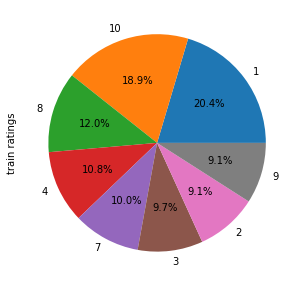

In [6]:
plot = ratings['train ratings'].value_counts().plot.pie(subplots=True, figsize=(5,5), autopct='%1.1f%%')

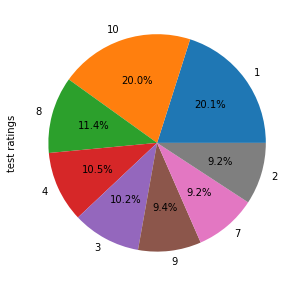

In [7]:
plot = ratings['test ratings'].value_counts().plot.pie(subplots=True, figsize=(5,5), autopct='%1.1f%%')

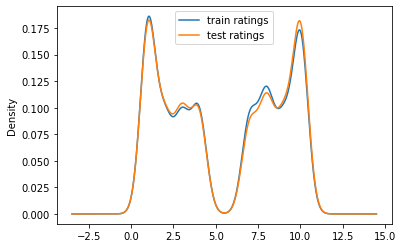

In [8]:
ax = ratings.plot.kde()

In [9]:
test_train = train['text'][3].split()
test_train1 = "he he are is are are"

In [10]:
# word_list = train['text'].split()
p_train_word_dict = {}

for row in range(len(train['text'][:12500])):
    p_train_word_list = train['text'][row].split()
    for word in p_train_word_list:
        if word in p_train_word_dict.keys():
            p_train_word_dict[word] = p_train_word_dict[word] + 1
        else:
            p_train_word_dict[word] = 1
    
# word_dict
p_train_word_dict_sorted = {k: v for k, v in sorted(p_train_word_dict.items(), key=lambda item: item[1])}


In [11]:
p_train_word_dict_sorted

{"High's": 1,
 "teachers'": 1,
 'INSPECTOR:': 1,
 'STUDENT:': 1,
 "isn't!": 1,
 'Homelessness': 1,
 'Houselessness': 1,
 'stated)': 1,
 'elections,': 1,
 'homeless?': 1,
 "Bolt's": 1,
 '/>Mel': 1,
 '(Jeffery': 1,
 'Tambor)': 1,
 'luxuries;': 1,
 "bet's": 1,
 'vagrant': 1,
 'forehead': 1,
 '(Lesley': 1,
 'Warren)': 1,
 'ex-dancer': 1,
 '(Howard': 1,
 'Morris)': 1,
 'Fumes': 1,
 '(Teddy': 1,
 'Stinks"': 1,
 'Saddles,': 1,
 'Monopoly': 1,
 'Lesley': 1,
 'Warren.': 1,
 'turncoat,': 1,
 'shrugs': 1,
 'indifferently': 1,
 'lawyer"': 1,
 'bleeds).': 1,
 'IDIOTS).': 1,
 'followable.': 1,
 '"Fume"': 1,
 '"Sailor"': 1,
 'quirky/insane': 1,
 'mystery/suspense': 1,
 'keeper.<br': 1,
 'teach,': 1,
 'inspect,': 1,
 'amuse.': 1,
 '(Williams),': 1,
 '7.7/10': 1,
 '/>Fine': 1,
 'unexpectedness': 1,
 '"critically': 1,
 'Collette).': 1,
 'secretآ…"': 1,
 'NOW...<br': 1,
 'leg?"': 1,
 '"deleted': 1,
 'Possibly,': 1,
 '"highway"': 1,
 'tape"': 1,
 'cut"?': 1,
 'Jess)': 1,
 'impersonation".': 1,
 'Anna),': 

In [12]:
# word_list = train['text'].split()
n_train_word_dict = {}

for row in range(len(train['text'][-12500:])):
    n_train_word_list = train['text'][row].split()
    for word in n_train_word_list:
        if word in n_train_word_dict.keys():
            n_train_word_dict[word] = n_train_word_dict[word] + 1
        else:
            n_train_word_dict[word] = 1
    
# word_dict
n_train_word_dict_sorted = {k: v for k, v in sorted(n_train_word_dict.items(), key=lambda item: item[1])}


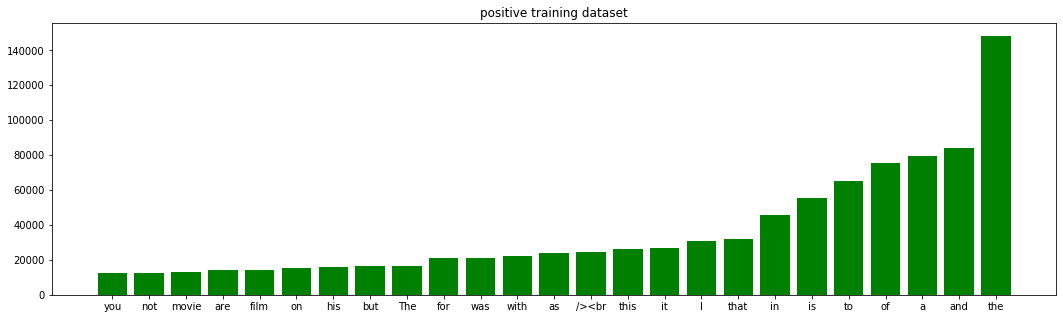

In [13]:
plt.subplots(figsize=(18,5))
plt.bar(list(p_train_word_dict_sorted.keys())[-25:], list(p_train_word_dict_sorted.values())[-25:], color='g')
plt.title('positive training dataset')
plt.show()

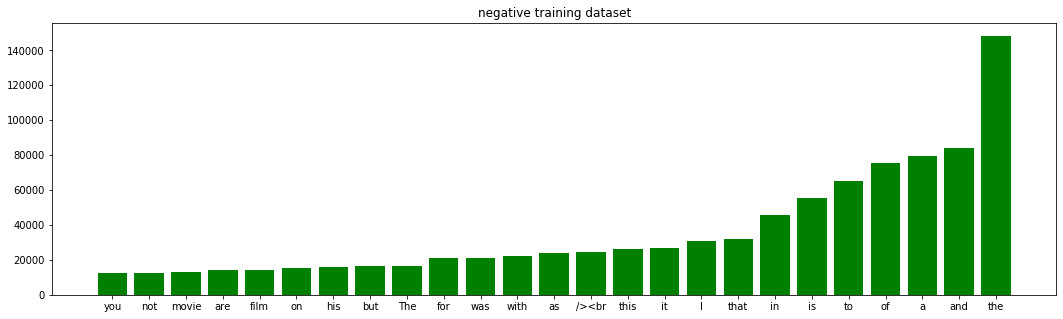

In [14]:
plt.subplots(figsize=(18,5))
plt.bar(list(n_train_word_dict_sorted.keys())[-25:], list(n_train_word_dict_sorted.values())[-25:], color='g')
plt.title('negative training dataset')
plt.show()

In [15]:
testy = 'ha is the car a is as dads an food good'
stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(testy)

filtered_sentence = [w for w in word_tokens if not w in stop_words] 
filtered_sentence


['ha', 'car', 'dads', 'food', 'good']

In [16]:

n_train_word_dict = {}

for row in range(len(train['text'][-12500:])):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(train['text'][row])

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
#     n_train_word_list = train['text'][row].split()
    for word in n_train_word_list:
        if word in n_train_word_dict.keys():
            n_train_word_dict[word] = n_train_word_dict[word] + 1
        else:
            n_train_word_dict[word] = 1
    
# word_dict
n_train_word_dict_sorted = {k: v for k, v in sorted(n_train_word_dict.items(), key=lambda item: item[1])}


In [17]:
n_train_word_dict_sorted

{'Working-class': 12500,
 'romantic': 12500,
 'drama': 12500,
 'director': 12500,
 'Martin': 12500,
 'Ritt': 12500,
 'unbelievable': 12500,
 'they': 12500,
 'come,': 12500,
 'yet': 12500,
 'there': 12500,
 'moments': 12500,
 'pleasure': 12500,
 'due': 12500,
 'mostly': 12500,
 'charisma': 12500,
 'stars': 12500,
 'Jane': 12500,
 'Fonda': 12500,
 'Robert': 12500,
 'De': 12500,
 'Niro': 12500,
 '(both': 12500,
 'terrific).': 12500,
 "She's": 12500,
 'widow': 12500,
 'who': 12500,
 "can't": 12500,
 'move': 12500,
 'on,': 12500,
 "he's": 12500,
 'illiterate': 12500,
 'closet-inventor--you': 12500,
 'can': 12500,
 'probably': 12500,
 'guess': 12500,
 'rest.': 12500,
 'Adaptation': 12500,
 'Pat': 12500,
 "Barker's": 12500,
 'novel': 12500,
 '"Union': 12500,
 'Street"': 12500,
 '(a': 12500,
 'better': 12500,
 'title!)': 12500,
 'so': 12500,
 'laid-back': 12500,
 'verges': 12500,
 'on': 12500,
 'bland,': 12500,
 "film's": 12500,
 'editing': 12500,
 'mess,': 12500,
 'but': 12500,
 "it's": 12500

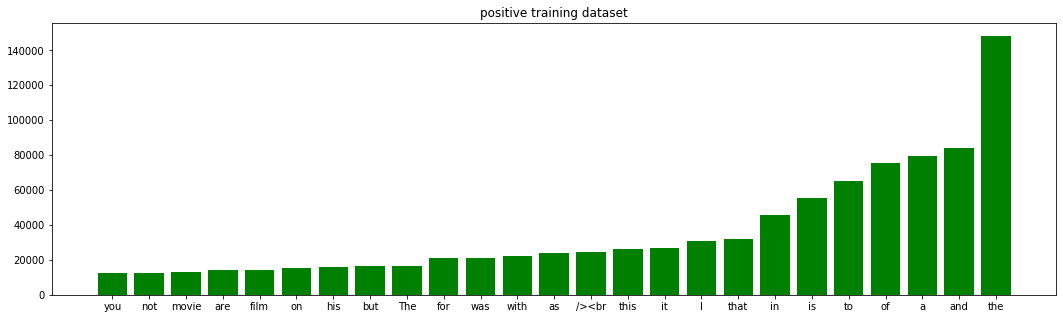

In [18]:
plt.subplots(figsize=(18,5))
plt.bar(list(p_train_word_dict_sorted.keys())[-25:], list(p_train_word_dict_sorted.values())[-25:], color='g')
plt.title('positive training dataset')
plt.show()